# Project Objective:

The purpose of this Deep Learning project is to combine AutoEncoder Network (Unsupervised Learning Network) and Artificial Neural Network (Supervised Learning Network) to correctly classify animals into different classes ("Types") based on the their features. This project can be considered as a Deep Learning multiclassification task. The idea is to use the AutoEncoder Network as the pretraining step, for dimensionality reduction and feature extraction on the input data and then use the “learned” features for the Artificial Neural Network classification task.

Why using an AutoEncoder Network? The AutoEncoder can provide a more compressed and important representation of the input data which can then be used in the ANN for better multiclassification performance.

# Exploratory Data Analysis, Data Processing, and Data Splitting

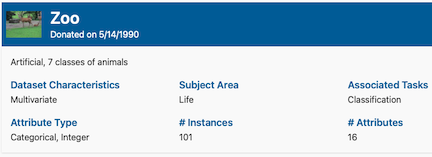

The data came from UCI Irvine Machine Learning Repository and was download as a zip file containing the following files: Index, zoo.data, zoo.names. This is a simple database containing 17 Boolean-valued attributes.  The "Type" attribute appears to be the class attribute.

The author stated that it's unsual for the database to have 2 instances of "frog" and 1 instance for "girl".


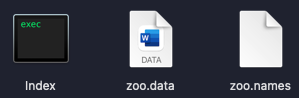

The “zoo.data” file was converted and formatted to excel file using Excel’s Data Tab option. After its conversion, a Panda’s csv code was implemented to convert the excel file into CSV file for EDA and Machine Learning purposes. The file "zoo.names" was used to understand the data.


## Dependencies

In [ ]:
# !pip install pandas-profiling # Applied Machine Learning Final Project, not neccesary

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
#from pandas_profiling import ProfileReport

import warnings
warnings.filterwarnings('ignore')

TensorFlow, Keras API, and other Dependencies:

In [ ]:
!pip install -q -U tensorflow

In [ ]:
#!pip install ann_visualizer -> not compatible

In [ ]:
#!pip install graphviz -> not compatible

In [3]:
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [ ]:
#from ann_visualizer.visualize import ann_viz

## From Excel File to CSV File

Reading the new Zoo Excel file:

In [ ]:
# excel = pd.read_excel('Zoo_Data.xlsx')
# excel.head()

,Animal,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Toothed,Backbone,Breathes,Venomous,Fins,Legs,Tail,Domestic,Catsize,Type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


After converting from Excel to CSV, you don't have to run the excel code anymore. Just run the CSV file to start the analysis and algorithms.

In [ ]:
# excel.to_csv('Zoo_Data.csv', index = None, header = True) run this code just once

As mentioned before, we have a DataFrame with 7 attributes and 101 instances. The data shows that each row corresponds to an animal name and each column contains specified characteristics of the animal like: hair, feathers, breathes, tail, predator etc.

In [4]:
df = pd.read_csv('Zoo_Data.csv')
df.head()

,Animal,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Toothed,Backbone,Breathes,Venomous,Fins,Legs,Tail,Domestic,Catsize,Type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


## Exploratory Data Analysis

`zoo.names: `

- Animal name: Unique for each instance
- Hair: Boolean
- Feathers: Boolean
- Eggs: Boolean
- Milk: Boolean
- Airborne: Boolean
- Aquatic: Boolean
- Predator: Boolean
- Toothed: Boolean
- Backbone: Boolean
- Breathes: Boolean
- Venomous: Boolean
- Fins: Boolean
- Legs: Numeric (set of values: {0,2,4,5,6,8})
- Tail: Boolean
- Domestic: Boolean
- Catsize: Boolean
- Type: Numeric (integer values in range [1,7])


In [5]:
print('The size of the dataframe is:', df.size)
print('The shape of the dataframe is:', df.shape)

The size of the dataframe is: 1818
The shape of the dataframe is: (101, 18)


In [6]:
# Lets check those duplicates.
# The Animal column was chosen due to the Authors observation in Data Description -> 2 instances for frog
duplicate_animals = df[df.duplicated('Animal', keep = False)]
dup_animal = duplicate_animals['Animal']

print('The duplicated animal is:')
print(dup_animal)

The duplicated animal is:
25    frog
26    frog
Name: Animal, dtype: object


In [7]:
# Lets drop that duplicated frogs
df = df.drop_duplicates(['Animal'])

In [8]:
print('The size of the dataframe after dropping duplicate is:', df.size)
print('The shape of the dataframe after dropping duplicate is:', df.shape)

The size of the dataframe after dropping duplicate is: 1800
The shape of the dataframe after dropping duplicate is: (100, 18)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 100
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Animal    100 non-null    object
 1   Hair      100 non-null    int64 
 2   Feathers  100 non-null    int64 
 3   Eggs      100 non-null    int64 
 4   Milk      100 non-null    int64 
 5   Airborne  100 non-null    int64 
 6   Aquatic   100 non-null    int64 
 7   Predator  100 non-null    int64 
 8   Toothed   100 non-null    int64 
 9   Backbone  100 non-null    int64 
 10  Breathes  100 non-null    int64 
 11  Venomous  100 non-null    int64 
 12  Fins      100 non-null    int64 
 13  Legs      100 non-null    int64 
 14  Tail      100 non-null    int64 
 15  Domestic  100 non-null    int64 
 16  Catsize   100 non-null    int64 
 17  Type      100 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.8+ KB


In [10]:
missing = df.isnull() # checking for missing values
count_missing = missing.sum()
print(count_missing) # we have no missing value in attributes

Animal      0
Hair        0
Feathers    0
Eggs        0
Milk        0
Airborne    0
Aquatic     0
Predator    0
Toothed     0
Backbone    0
Breathes    0
Venomous    0
Fins        0
Legs        0
Tail        0
Domestic    0
Catsize     0
Type        0
dtype: int64


If we pay close attention to the zoo.name file, we can see that all columns have Boolean binary values of 1 and 0 except for columns Animal, Legs, and Type. Let’s check the unique values of the two columns: Legs and Type (Animal column has already unique values by default which are the names of the animals).

In [11]:
leg_values = df['Legs'].unique()
numeric_values = df['Type'].unique()

print('The unique leg values should be:', leg_values) # set of values: {0,2,4,5,6,8}
print('The unique numeric values should be:', numeric_values) # (integer values in range [1,7])

The unique leg values should be: [4 0 2 6 8 5]
The unique numeric values should be: [1 4 2 7 6 5 3]


In [12]:
df.describe() # descriptive statistics about the Zoo data

,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Toothed,Backbone,Breathes,Venomous,Fins,Legs,Tail,Domestic,Catsize,Type
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.43000,0.200000,0.580000,0.410000,0.240000,0.350000,0.55,0.600000,0.820000,0.79000,0.070000,0.170000,2.830000,0.750000,0.130000,0.440000,2.810000
std,0.49757,0.402015,0.496045,0.494311,0.429235,0.479372,0.50,0.492366,0.386123,0.40936,0.256432,0.377525,2.040276,0.435194,0.337998,0.498888,2.101923
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,1.000000,1.00000,0.000000,0.000000,2.000000,0.750000,0.000000,0.000000,1.000000
50%,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.00,1.000000,1.000000,1.00000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,2.000000
75%,1.00000,0.000000,1.000000,1.000000,0.000000,1.000000,1.00,1.000000,1.000000,1.00000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,1.00000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


### New DataFrame for Classes Columns

Lets visualize/understand a little bit more the Classes. Pandas Pivot() function will be used to reshape the DataFrame. We are pivoting the "Type" column values in order to create new columns based on those unique values. The new dataframe `class_df` also contains "Animal" names as values for those new created columns. We will proceed by adding the word "Class" to each "Type" Value (1 to 7). Finally, we reset the dataframe using the "reset_index" with both drop and inplace set to True.

In [13]:
class_df = df.pivot(columns = 'Type', values = 'Animal') # Pivot the Type Column and assign the Animal names
class_df.columns = [f'Class {col}' for col in class_df.columns] # adding Class to each Type
class_df.reset_index(drop = True, inplace = True) # reset index

class_df.head()

,Class 1,Class 2,Class 3,Class 4,Class 5,Class 6,Class 7
0,aardvark,NaN,NaN,NaN,NaN,NaN,NaN
1,antelope,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,bass,NaN,NaN,NaN
3,bear,NaN,NaN,NaN,NaN,NaN,NaN
4,boar,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Lets print the unique Animal for each Type (Class)
for column in class_df.columns:
    animals = class_df[column].dropna().tolist() # lets drop NaN values and convert result to list
    indv_animal = ', '.join(animals) # animal list to animal string (individual comma separation) -> ", ".join(my_list)

    print(f'{column}: {indv_animal}')

Class 1: aardvark, antelope, bear, boar, buffalo, calf, cavy, cheetah, deer, dolphin, elephant, fruitbat, giraffe, girl, goat, gorilla, hamster, hare, leopard, lion, lynx, mink, mole, mongoose, opossum, oryx, platypus, polecat, pony, porpoise, puma, pussycat, raccoon, reindeer, seal, sealion, squirrel, vampire, vole, wallaby, wolf
Class 2: chicken, crow, dove, duck, flamingo, gull, hawk, kiwi, lark, ostrich, parakeet, penguin, pheasant, rhea, skimmer, skua, sparrow, swan, vulture, wren
Class 3: pitviper, seasnake, slowworm, tortoise, tuatara
Class 4: bass, carp, catfish, chub, dogfish, haddock, herring, pike, piranha, seahorse, sole, stingray, tuna
Class 5: frog, newt, toad
Class 6: flea, gnat, honeybee, housefly, ladybird, moth, termite, wasp
Class 7: clam, crab, crayfish, lobster, octopus, scorpion, seawasp, slug, starfish, worm


In [15]:
for column in class_df.columns:
    animal_count = class_df[column].count() # count the number of animals in each Type (Class 1 - 7)
    print(f'{column}: contains {animal_count} animals')

Class 1: contains 41 animals
Class 2: contains 20 animals
Class 3: contains 5 animals
Class 4: contains 13 animals
Class 5: contains 3 animals
Class 6: contains 8 animals
Class 7: contains 10 animals


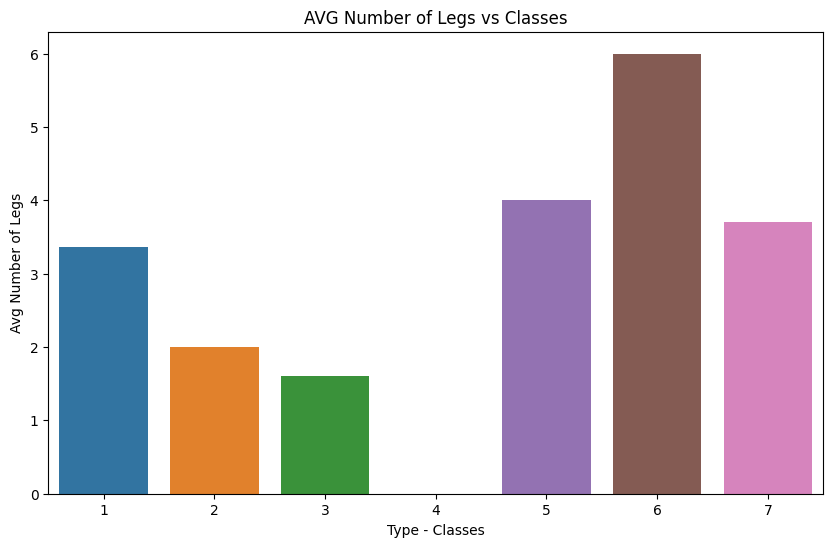

In [16]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'Type', y = 'Legs', data = df, ci = None) # I was getting some black error lines
plt.title('AVG Number of Legs vs Classes')
plt.xlabel('Type - Classes')
plt.ylabel('Avg Number of Legs')
plt.show()

### Correlation Matrix

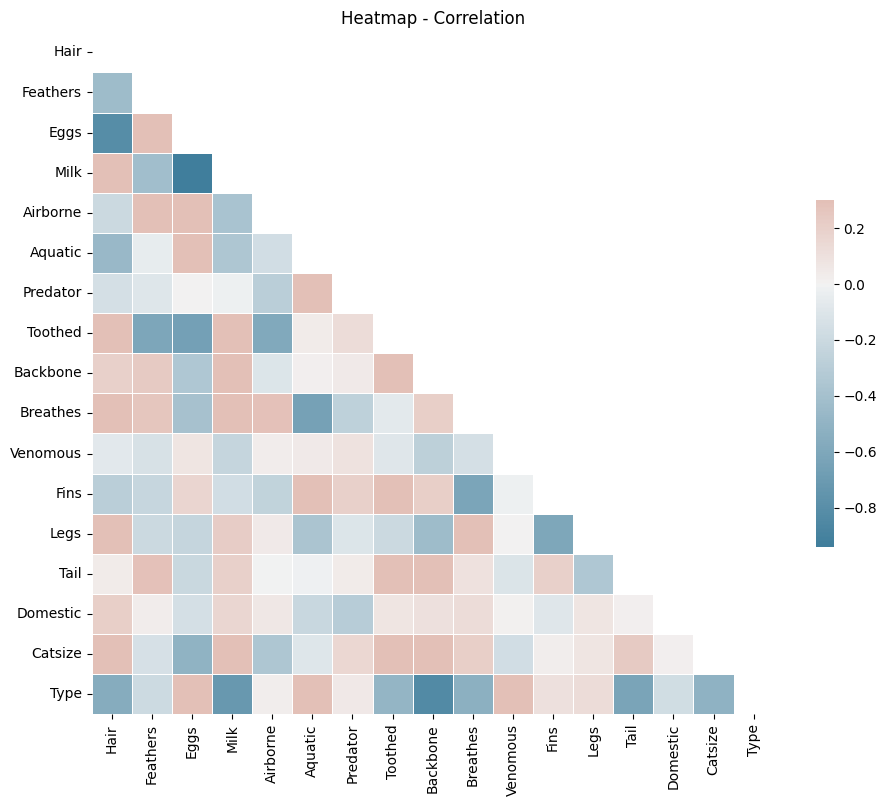

In [17]:
corr = df.corr() # Computing Correlation matrix

mask = np.triu(np.ones_like(corr, dtype=bool)) # Generate a mask for the upper triangle
f, ax = plt.subplots(figsize=(11, 9)) # Set up the matplotlib figure
cmap = sns.diverging_palette(230, 20, as_cmap=True) # Generate a custom diverging colormap
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={'shrink': .5})

plt.title('Heatmap - Correlation')
plt.show()

## Data Processing

Before we `train_test_split` the data using SKlearn, we are going to drop the “Animal” and the “Type” columns from X. We are just dropping the “Animal” column because it’s just a categorical data that won’t really help us that much in terms of predictions. In contrast, the “Type” column its our target value, so the model will need to learn how to predict those target values using all those learned features and eventually the unseen data. We split the data using SKlearn `train_test_split` to get the train, validation, and test sets (setting the training set to a 80%, the test size to 20% and random state to 42 -> these are basic values used from the Applied Machine Learning class).

In [18]:
X = df.drop(['Type', 'Animal'], axis = 1) # features
y = df['Type'] # target values

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42) # validation sets

`MinMaxScaler:`

- MinMaxScaler scales all the data features in the range [0, 1] or else in the range [-1, 1] if there are negative values in the dataset. This scaling compresses all the inliers in the narrow range [0, 0.005].

`StandardScaler:`

- StandardScaler follows Standard Normal Distribution (SND). Therefore, it makes mean = 0 and scales the data to unit variance.

Due to the presence of outliers, StandardScaler does not guarantee balanced feature scales. This leads to the shrinkage in the range of the feature values. By using RobustScaler(), we can remove the outliers and then use either StandardScaler or MinMaxScaler for preprocessing the dataset.

However, just by analyzing the Zoo dataset, we see that is has no risk of outliers (we have binary values and other numeric values which are in ranges from 0 to 8 like the number of legs and Type). Due to this, I don't consider using the RobustScaler() necessary at all.

Since we are mostly dealing with binary values of 1 and 0 for almost all columns, except for "Legs" and "Types" columns, we are going to be using MinMax Scaler to scale the binary data.

For column "Legs" we are going to be using StandardScaler as part of the preprocessing step for that column in particular. Its also important to state that if we take a look to the above descriptive statistics from `df.describe()` the "Legs" column has standard deviation larger than 1, reason why we could use standard scaler. Since we already dropped "Type" above we only take "Legs" into account.

During the Applied Machine Learning class with Professor James Shanahan, we had the opportunity to explore data pipelines and Transformers in order to preprocessed and transformed our data.



In [20]:
std_scaler_col = ['Legs'] # these are not binary values, thats why we are using std scaler
minmax_col = [col for col in X_train.columns if col not in std_scaler_col] # lets filter columns that are not in std_scaler_col

preprocessor = ColumnTransformer(transformers = [
                                ('std_scaler', StandardScaler(), std_scaler_col),
                                ('minmax_scaler', MinMaxScaler(), minmax_col)])

In [21]:
X_train_scaled = preprocessor.fit_transform(X_train) # preprocessor
X_valid_scaled = preprocessor.transform(X_valid) # preprocessor
X_test_scaled = preprocessor.transform(X_test) # preprocessor

In [22]:
X_train_scaled.shape[1] # 16 features

16

In [23]:
X_test_scaled.shape

(20, 16)

# Unsupervised Network: The AutoEncoder

What is an Unsupervised Network? It’s a type of network that learns patterns from data without any training labels. The network finds its patterns in the data without being told what the patterns should be.

**AutoEncoder model -> Unsupervised Network**

**Types of Feature Extraction for Dimensionality Reduction -> AutoEncoder**

Dimensionality Reduction: is the process of reducing the number of dimensions in the data either by excluding less useful features (feature selection) or transform the data into lower dimensions (feature extraction). This technique can help prevent overfitting cases (when the models learn too well from the training set and fails to generalize well for unseen data) as well.

*Last semester, I had the opportunity to use PCA (principal component analysis) for dimensionality reduction in one of my Machine Learning experiments for THE 12K image dataset, which was pretty useful.*

The AutoEncoder models are a class of Unsupervised Networks that consist of two major networks:
-	Encoders
-	Decoders

`For the purpose of this project, we are going to be using this type of model for Feature Extraction and Dimensionality Reduction to improve performance.` This will help us get extra features with less redundant and noisy data. The network captures important features and patterns without requiring labeled examples.

This model attempts to encode the data by compressing it into lower dimensions (bottleneck layer) and the decoding the data to reconstruct the original input. **The bottleneck Layer holds the compressed representation of the input data (if trained correctly, this layer can hold the most important features of the input data).**


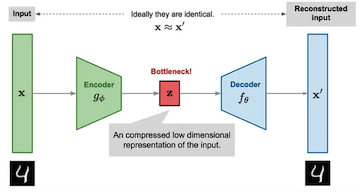

An autoencoder works by minimizing the reconstruction error between the input and output data. The reconstruction error is the difference between the input and output data, and it is calculated using a loss function. The loss function measures how well the autoencoder is able to reconstruct the input data.

In [24]:
features = X_train_scaled.shape[1]  # 16 features
encoding_dimensions = 16 # due to the 16 we have above/using this for ANN as well
input_dim = features

Since the purpose of this model is just for feature extraction/dimensionality reduction, I am keeping the structure very simple. We might have to change or add layers or other techniques to the architecture depending on its performance.

It is important for this model to really capture the necessary data in a lower dimensional space. Regarding the `Binary Cross-Entropy Loss`, I am applying this loss to the AE architecture because all columns have binary values of 0 and 1 (these columns were scaled using MinMax), except for Legs column which was scaled using StandardScaler (Legs column has a range of values). This will not affect the ANN multiclassification task at all.

In [25]:
input_layer = Input(shape = (input_dim, )) # building input layer

encoded = Dense(encoding_dimensions, activation='relu')(input_layer) # encoding layer (this is what we need for ANN)

decoded = Dense(input_dim, activation='sigmoid')(encoded) # decoding layer which reconstructs data

output_layer = decoded

# Defining paramaters of the autoencoder model
# Considering almost all columns, except for Legs and Types, have binary values of 0 and 1. Lets stick to BCE
# Lets just stick to Adam Optimizer
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(loss = 'binary_crossentropy', # mse?, This won't affect later stages of the multiclassification task
                    optimizer = 'adam')


**Activation Functions:**

`Relu Activation Function` (Rectified Activation Function): With default values, this returns the standard ReLU activation: max(x, 0), the element-wise maximum of 0 and the input tensor. This function introduces non-linearity to the model. It also helps with the vanishing gradient issue.

$$ReLU(x) = (x)^+ = \max(0, x)$$


`Sigmoid Activation Function` Will always returns a value between 0 and 1.

$$\text{Sigmoid}(x) = \sigma(x) = \frac{1}{1 + e^{-x}}$$


`Binary Cross Entropy` Computes the cross-entropy loss between true labels and predicted labels.

$$\mathcal{L}_{\text{BCE}}(y, \hat{y}) = -\frac{1}{N}\sum_{i=1}^{N} y_i \log(\hat{y_i}) + (1 - y_i) \log(1 - \hat{y_i})$$

In [26]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 16)]              0         
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
Total params: 544 (2.12 KB)
Trainable params: 544 (2.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


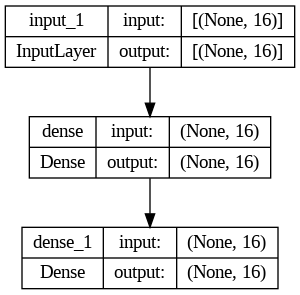

In [27]:
plot_model(autoencoder, to_file='AutoEncoder_model_plot.png', show_shapes=True, show_layer_names=True)

## Training AutoEncoder

In [28]:
# Decided to include EarlyStopping here, this might help for the whole AE pretraining process.
# EarlyStopping -> it will stop the training model doesn't improve in 5 consectuve epochs

epochs = 100 # randomly chosen, I like to use 100 for the number of epochs
batch = 32 # default batch size from Applied Machine Learning
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 1)

# The autoencoder will try to reconstruct its input features of the animals.
# So, during training, we want the input data to also be the target output data.
#
autoencoder_history = autoencoder.fit(X_train_scaled, X_train_scaled,
                                      epochs = epochs, batch_size = batch,
                                      shuffle = True, validation_data = (X_valid_scaled, X_valid_scaled),
                                      callbacks = [early_stop])

Epoch 1/100
2/2 [==============================] - 1s 328ms/step - loss: 0.6867 - val_loss: 0.6698
Epoch 2/100
2/2 [==============================] - 0s 71ms/step - loss: 0.6810 - val_loss: 0.6644
Epoch 3/100
2/2 [==============================] - 0s 51ms/step - loss: 0.6757 - val_loss: 0.6591
Epoch 4/100
2/2 [==============================] - 0s 65ms/step - loss: 0.6703 - val_loss: 0.6539
Epoch 5/100
2/2 [==============================] - 0s 65ms/step - loss: 0.6650 - val_loss: 0.6488
Epoch 6/100
2/2 [==============================] - 0s 50ms/step - loss: 0.6599 - val_loss: 0.6438
Epoch 7/100
2/2 [==============================] - 0s 49ms/step - loss: 0.6547 - val_loss: 0.6389
Epoch 8/100
2/2 [==============================] - 0s 68ms/step - loss: 0.6497 - val_loss: 0.6340
Epoch 9/100
2/2 [==============================] - 0s 48ms/step - loss: 0.6449 - val_loss: 0.6292
Epoch 10/100
2/2 [==============================] - 0s 59ms/step - loss: 0.6403 - val_loss: 0.6244
Epoch 11/100
2/2 [

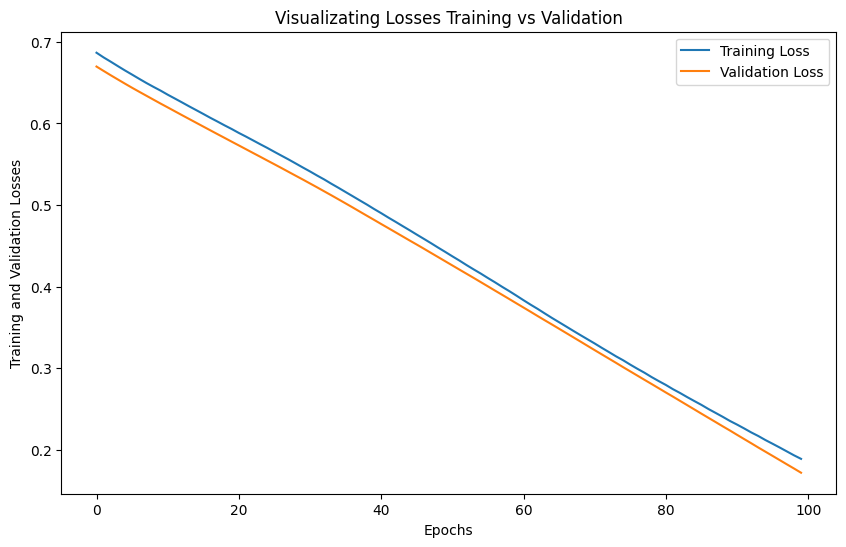

In [29]:
# No TensorBoard this time
# Since this is my first time combining 1 models, I want this to be as simple as possible.

plt.figure(figsize=(10,6))
plt.plot(autoencoder_history.history['loss'])
plt.plot(autoencoder_history.history['val_loss'])


plt.title('Visualizating Losses Training vs Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epochs')
plt.legend(['Training Loss', 'Validation Loss'])

If we take a look to the results and the above graph, we can see that both losses (training and validation) are decreasing over time. This might be a good sign in most cases, and it also shows how the AutoEncoder is actually learning and is able to reconstruct the input data with each epoch.

We can also see a small difference or gap in the graph, but this is extremely small which can indicate the model isn’t suffering from a case of overfitting.

## AutoEncoder Performance (Reconstruction Error)

We need to define a loss function that measures the difference between the input and output data. In the AutoEncoder Network case, the loss function is typically the MSE (Mean Squared Error) and it will be used to calculate reconstruction error between the original and reconstructed data. The MSE defined as the mean of the squared difference between our network output and the ground truth.

`Mean Squared Error:` In this case, the MSE is the loss function used to measure the performance of the AutoEncoder Network.

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_{i} - \hat{y_{i}})^{2}
$$


The AutoEncoders aim to minimize the MSE between the original data and reconstructed data.



In [30]:
reconstructed_data = autoencoder.predict(X_test_scaled) # reconstructed data

mse = mean_squared_error(X_test_scaled, reconstructed_data) # MSE between original data and reconstructed data

print('AutoEncoder MSE is:', mse) # can idicate how well the network is capturing features from the data

1/1 [==============================] - 0s 133ms/step
AutoEncoder MSE is: 0.1504699277689695


The above code is for MSE comparison, I am creating a worst-case scenario baseline that adds noise to test the above MSE results. I am expecting the Random Noise MSE to be bigger than the MSE with no noise. If this is the case, then the AutoEncoder might be learning a significant representation of the data and not producing random noise.

In [31]:
# Creating a worst case scenario baseline to add noise to test the AE MSE.
# Excpecting random noise MSE to be bigger than AutoEncoder MSE (which might be a good sign).
random_noise = np.random.random_sample(X_test_scaled.shape) # generate random numbers between 0 and 1

mse_noise = mean_squared_error(X_test_scaled, random_noise) # MSE between original data and random noise

print('Random Noise MSE is:', mse_noise)

Random Noise MSE is: 0.4707617291358735


## Extracting Encoder

Important: The encoded layer of the autoencoder network includes the "bottleneck" which contains the smallest encoding dimensions.

In [32]:
# Extract the encoder part of the autoencoder model
# dense_1 -> encoded layer
# dense_2 -> decoded layer
inputs = autoencoder.input
outputs = autoencoder.get_layer('dense_1').output # dense_1 -> Important! This is the encoded layer

encoder = Model(inputs, outputs)

In [33]:
X_train_encoded = encoder.predict(X_train_scaled) # transform data using encoder
X_valid_encoded = encoder.predict(X_valid_scaled) # transform data using encoder
X_test_encoded = encoder.predict(X_test_scaled) # transform data using encoder

1/1 [==============================] - 0s 33ms/step


In [34]:
X_train_encoded.shape

(64, 16)

In [35]:
X_test_encoded.shape

(20, 16)

# Supervised Network: Artificial Neural Network (ANN)

A Supervised Network is when the model or network is trained to return specific outputs when given specific inputs. As mentioned before, the ANN will take on the learned features from the AutoEncoder to correctly classify the type of animal. We are basically leveraging the learning and prediction capabilities of the ANN Network. This is because we are removing redundant/noisy data making it easier for the ANN to make much more accurate predictions.

Let's ANN architecture:

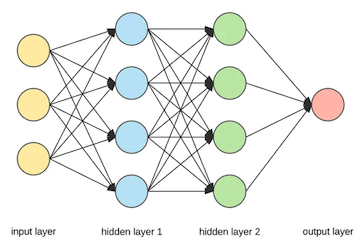

Zoom:

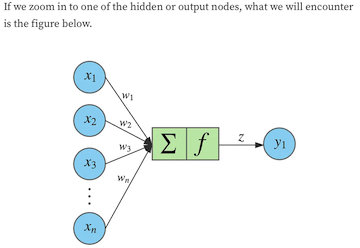



Besides using ReLU Activation function, I am introducing the Softmax Activation function as shown below. Why? The raw outputs of a neural network are often very difficult to interpret. The Softmax function simplifies this task for us.  It transforms the raw outputs of the neural network into a vector of probabilities, essentially a probability distribution over the input classes. It gets the highest probability of the model’s prediction.

`Softmax Activation Function:` Function used to train a neural network to solve problems of multiclass classification. Each neuron in the output layer yields a probability for the corresponding class, and thanks to the softmax function, the sum of all the probabilities is 1.0.

$$
Softmax(z)_j = \frac{e^{z_j}}{\sum_{k=1}^{K} e^{z_k}}
$$

Example using Softmax on Image:

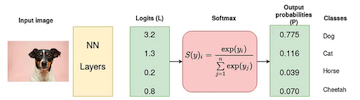


`Categorical Cross Entropy Loss`: Along with the Softmax Activation Function, I am also applying the Categorical Cross Entropy Loss which is the loss used for these types of multiclass classification tasks (Softmax Loss). This loss helps train the ANN to output a probability distribution over the N different animal types.

In multiclass classification, the raw outputs of the neural network are passed through the softmax activation, which then outputs a vector of predicted probabilities over the input classes.

$$
\mathcal{L}_{\text{CCE}}(Y, \hat{Y}) = -\frac{1}{N}\sum_{i=1}^{N} \sum_{j=1}^{C} y_{ij} \log(\hat{y}_{ij})
$$


Following the dog image example from above, here's an example regarding Softmax and the Categorical Cross Entropy Loss:

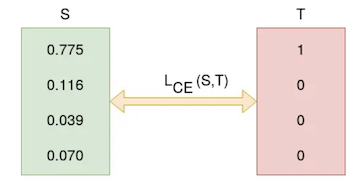

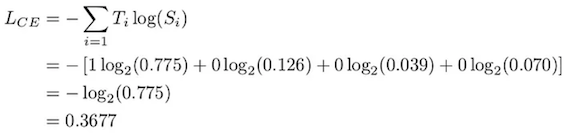

## ANN Model Experiment 1

In [36]:
# encoding_dimensions = 16
classes = 7 # 7 classes

ANN_model = Sequential()

# Neuron numbers from Applied Machine Learning
ANN_model.add(Dense(128, activation = 'relu', input_shape=(encoding_dimensions, ))) # matching encoded data from AE
ANN_model.add(Dense(64, activation = 'relu'))
ANN_model.add(Dense(classes, activation = 'softmax')) # activation function for multiclassification tasks


ANN_model.compile(optimizer = 'adam', # bets optimizer APML
                  loss = 'categorical_crossentropy', # for multiclassification tasks
                  metrics = ['accuracy'])

In [37]:
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               2176      
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 7)                 455       
                                                                 
Total params: 10887 (42.53 KB)
Trainable params: 10887 (42.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


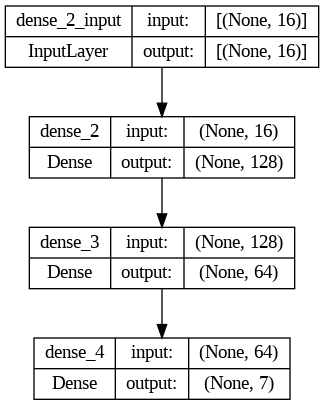

In [38]:
plot_model(ANN_model, to_file='ANN_model1_plot.png', show_shapes=True, show_layer_names=True)

### Training ANN Model Experiment 1

Since we are applying the Softmax activation function to the output layer and also the Categorical Cross Entropy Loss as our loss, we need to process our target data (y_train, y_valid, and y_test) in a way it matches the output layer of the ANN Network. Due to this, the target data is going to be one-hot-encoded using Kera’s `to_categorical()`.

Using `to_categorical()` method, a numpy array (or) a vector which has integers that represent different categories, can be converted into a numpy array (or) a matrix which has binary values and has columns equal to the number of categories in the data. It will basically transform the "Type" or class labels into binary vectors with a length equal to the number of classes.

Something like this:

1 -> [1, 0, 0, 0, 0, 0, 0]

2 -> [0, 1, 0, 0, 0, 0, 0]

3 -> [0, 0, 1, 0, 0, 0, 0]

4 -> [0, 0, 0, 1, 0, 0, 0]

5 -> [0, 0, 0, 0, 1, 0, 0]

6 -> [0, 0, 0, 0, 0, 1, 0]

7 -> [0, 0, 0, 0, 0, 0, 1]


*When I tried running the model I got the following error:*

`IndexError: index 7 is out of bounds for axis 1 with size 7.`

(Experimentation) Due to this, I decided to subtract -1 to the target values because it seemes that Keras might be assuming a range from 0 to 6 and not a range from 1 to 7 as I thought? At the end, I am going to try and add +1 to the final predicted labels to shift back the original range of Types (classes 1 to 7).

In [39]:
y_train_minus = y_train - 1
y_valid_minus = y_valid - 1
y_test_minus = y_test - 1

In [40]:
# y_train_encoded = to_categorical(y_train, num_classes = classes)

y_train_encoded = to_categorical(y_train_minus, num_classes = classes) # One hot encoded version of y_train_minus
y_valid_encoded = to_categorical(y_valid_minus, num_classes = classes) # One hot encoded version of y_valid_minus
y_test_encoded = to_categorical(y_test_minus, num_classes = classes) # One hot encoded version of y_test_minus

In [41]:
y_train_encoded.shape

(64, 7)

In [42]:
# No early stopping here

epochs = 100
batch = 32

ann_history = ANN_model.fit(X_train_encoded, y_train_encoded,
                            epochs = epochs,
                            batch_size = batch,
                            validation_data = (X_valid_encoded, y_valid_encoded))

Epoch 1/100
2/2 [==============================] - 2s 340ms/step - loss: 1.9280 - accuracy: 0.2031 - val_loss: 1.8510 - val_accuracy: 0.8750
Epoch 2/100
2/2 [==============================] - 0s 70ms/step - loss: 1.8388 - accuracy: 0.7031 - val_loss: 1.7732 - val_accuracy: 0.6250
Epoch 3/100
2/2 [==============================] - 0s 50ms/step - loss: 1.7659 - accuracy: 0.5938 - val_loss: 1.7004 - val_accuracy: 0.5625
Epoch 4/100
2/2 [==============================] - 0s 62ms/step - loss: 1.6942 - accuracy: 0.5938 - val_loss: 1.6294 - val_accuracy: 0.5625
Epoch 5/100
2/2 [==============================] - 0s 69ms/step - loss: 1.6312 - accuracy: 0.5938 - val_loss: 1.5600 - val_accuracy: 0.5625
Epoch 6/100
2/2 [==============================] - 0s 69ms/step - loss: 1.5692 - accuracy: 0.5938 - val_loss: 1.4963 - val_accuracy: 0.5625
Epoch 7/100
2/2 [==============================] - 0s 73ms/step - loss: 1.5064 - accuracy: 0.5938 - val_loss: 1.4387 - val_accuracy: 0.5625
Epoch 8/100
2/2 [==

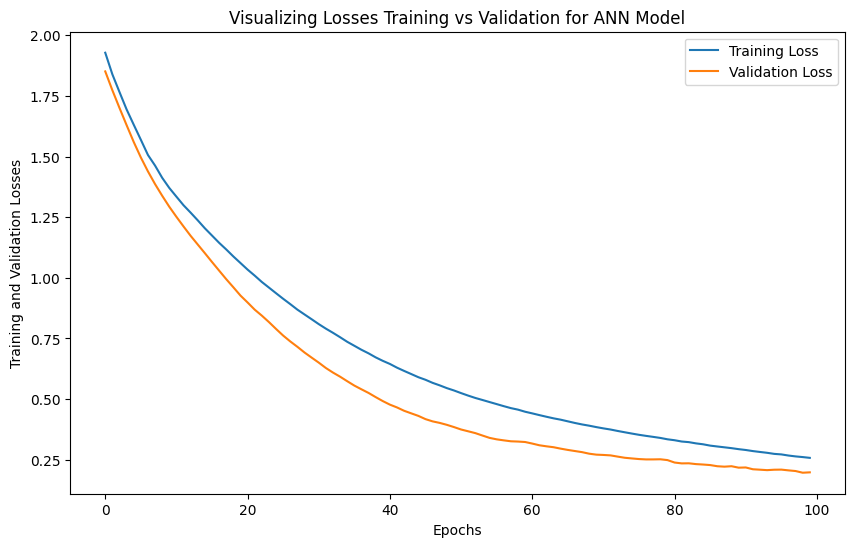

In [43]:
plt.figure(figsize=(10,6))
plt.plot(ann_history.history['loss'])
plt.plot(ann_history.history['val_loss'])

plt.title('Visualizing Losses Training vs Validation for ANN Model')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epochs')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

In [44]:
min_tloss_1 = ann_history.history['loss']
min_tloss_1 = min(min_tloss_1)

min_vloss_1 = ann_history.history['val_loss']
min_vloss_1 = min(min_vloss_1)

acc1 = ann_history.history['accuracy']
acc1 = max(acc1)


print('Results from Experiment 1 (No extra layers, No Regularization techniques): ')
print('\n')
print('Training Loss for experiment 1 is:' ,np.round(min_tloss_1,4))
print('Validation Loss for experiment 1 is:' ,np.round(min_vloss_1,4))
print('Accuracy for experiment 1 is:' ,np.round(acc1,4))

Results from Experiment 1 (No extra layers, No Regularization techniques): 


Training Loss for experiment 1 is: 0.2579
Validation Loss for experiment 1 is: 0.1966
Accuracy for experiment 1 is: 0.9531


## ANN Model Experiment 2

In [45]:
# encoding_dimensions = 16
# classes = 7

ANN_model2 = Sequential()

# Neuron numbers from Applied Machine Learning
ANN_model2.add(Dense(128, activation = 'relu', input_shape=(encoding_dimensions, ))) # matching encoded data from AE
ANN_model2.add(Dropout(0.2)) # dropout technique
ANN_model2.add(Dense(64, activation = 'relu'))
ANN_model2.add(Dropout(0.2)) # dropout technique
ANN_model2.add(Dense(classes, activation = 'softmax')) # activation function for multiclassification tasks

ANN_model2.compile(optimizer = 'adam', # bets optimizer APML
                  loss = 'categorical_crossentropy', # for multiclassification tasks
                  metrics = ['accuracy'])


In [46]:
ANN_model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               2176      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 7)                 455       
                                                                 
Total params: 10887 (42.53 KB)
Trainable params: 10887 (42.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


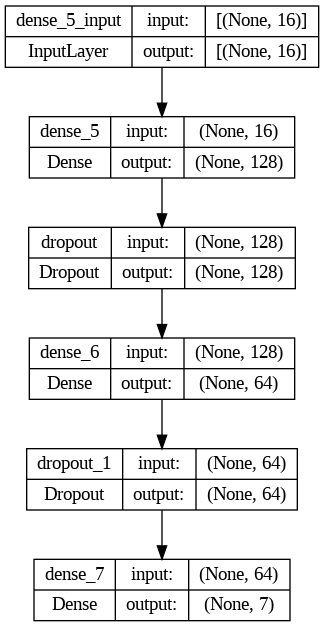

In [47]:
plot_model(ANN_model2, to_file='ANN_model2_plot.png', show_shapes=True, show_layer_names=True)

### Training ANN Model Experiment 2

In [48]:
epochs = 100
batch = 32

ann_history2 = ANN_model2.fit(X_train_encoded, y_train_encoded,
                            epochs = epochs,
                            batch_size = batch,
                            validation_data = (X_valid_encoded, y_valid_encoded))

Epoch 1/100
2/2 [==============================] - 1s 210ms/step - loss: 2.0786 - accuracy: 0.0781 - val_loss: 2.0172 - val_accuracy: 0.1250
Epoch 2/100
2/2 [==============================] - 0s 38ms/step - loss: 1.9930 - accuracy: 0.1875 - val_loss: 1.9405 - val_accuracy: 0.1875
Epoch 3/100
2/2 [==============================] - 0s 35ms/step - loss: 1.9398 - accuracy: 0.2344 - val_loss: 1.8698 - val_accuracy: 0.5000
Epoch 4/100
2/2 [==============================] - 0s 54ms/step - loss: 1.8721 - accuracy: 0.2812 - val_loss: 1.8082 - val_accuracy: 0.5000
Epoch 5/100
2/2 [==============================] - 0s 34ms/step - loss: 1.8349 - accuracy: 0.3750 - val_loss: 1.7519 - val_accuracy: 0.8750
Epoch 6/100
2/2 [==============================] - 0s 33ms/step - loss: 1.7917 - accuracy: 0.4375 - val_loss: 1.6980 - val_accuracy: 0.8750
Epoch 7/100
2/2 [==============================] - 0s 52ms/step - loss: 1.7477 - accuracy: 0.4844 - val_loss: 1.6479 - val_accuracy: 0.7500
Epoch 8/100
2/2 [==

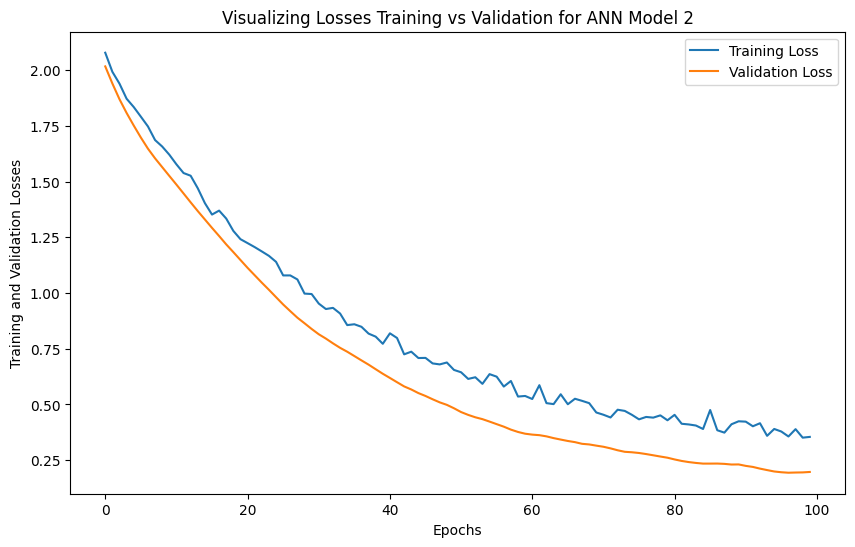

In [49]:
plt.figure(figsize=(10,6))
plt.plot(ann_history2.history['loss'])
plt.plot(ann_history2.history['val_loss'])

plt.title('Visualizing Losses Training vs Validation for ANN Model 2')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epochs')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

In [50]:
min_tloss_2 = ann_history2.history['loss']
min_tloss_2 = min(min_tloss_2)

min_vloss_2 = ann_history2.history['val_loss']
min_vloss_2 = min(min_vloss_2)

acc2 = ann_history2.history['accuracy']
acc2 = max(acc2)


print('Results from Experiment 2 (with Dropout technique of 0.2): ')
print('\n')
print('Training Loss for experiment 2 is:' ,np.round(min_tloss_2,4))
print('Validation Loss for experiment 2 is:' ,np.round(min_vloss_2,4))
print('Accuracy for experiment 2 is:' ,np.round(acc2,4))

Results from Experiment 2 (with Dropout technique of 0.2): 


Training Loss for experiment 2 is: 0.3508
Validation Loss for experiment 2 is: 0.1934
Accuracy for experiment 2 is: 0.9219


## ANN Model Experiment 3

In [51]:
# encoding_dimensions = 16
# classes = 7

ANN_model3 = Sequential()

ANN_model3.add(Dense(128, activation = 'relu', input_shape=(encoding_dimensions,), kernel_regularizer=regularizers.l2(0.01))) # l2 regularization
ANN_model3.add(Dropout(0.5)) # dropout
ANN_model3.add(Dense(64, activation = 'relu', kernel_regularizer=regularizers.l2(0.01))) # l2 regularization
ANN_model3.add(Dropout(0.5)) # dropout
ANN_model3.add(Dense(classes, activation = 'softmax'))

ANN_model3.compile(optimizer = 'adam', # bets optimizer APML
                  loss = 'categorical_crossentropy', # for multiclassification tasks
                  metrics = ['accuracy'])

In [52]:
ANN_model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               2176      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 7)                 455       
                                                                 
Total params: 10887 (42.53 KB)
Trainable params: 10887 (42.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


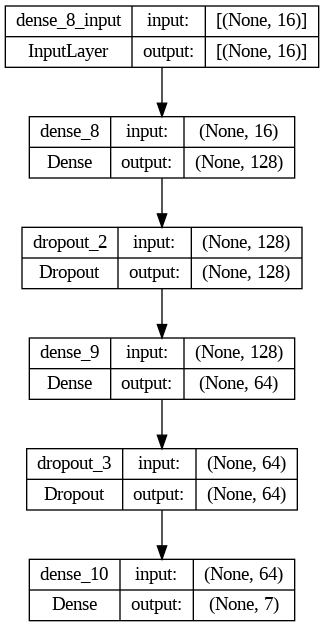

In [53]:
plot_model(ANN_model3, to_file='ANN_model3_plot.png', show_shapes=True, show_layer_names=True)

### Training ANN Model Experiment 3

In [54]:
epochs = 100
batch = 32

ann_history3 = ANN_model3.fit(X_train_encoded, y_train_encoded,
                            epochs = epochs,
                            batch_size = batch,
                            validation_data = (X_valid_encoded, y_valid_encoded))

Epoch 1/100
2/2 [==============================] - 1s 348ms/step - loss: 3.2757 - accuracy: 0.0781 - val_loss: 3.2191 - val_accuracy: 0.0000e+00
Epoch 2/100
2/2 [==============================] - 0s 53ms/step - loss: 3.1570 - accuracy: 0.1250 - val_loss: 3.1318 - val_accuracy: 0.0000e+00
Epoch 3/100
2/2 [==============================] - 0s 57ms/step - loss: 3.0764 - accuracy: 0.1875 - val_loss: 3.0441 - val_accuracy: 0.1250
Epoch 4/100
2/2 [==============================] - 0s 78ms/step - loss: 3.0406 - accuracy: 0.1562 - val_loss: 2.9681 - val_accuracy: 0.3750
Epoch 5/100
2/2 [==============================] - 0s 71ms/step - loss: 2.9780 - accuracy: 0.2188 - val_loss: 2.8987 - val_accuracy: 0.5625
Epoch 6/100
2/2 [==============================] - 0s 50ms/step - loss: 2.9577 - accuracy: 0.2031 - val_loss: 2.8325 - val_accuracy: 0.6250
Epoch 7/100
2/2 [==============================] - 0s 89ms/step - loss: 2.8608 - accuracy: 0.3906 - val_loss: 2.7736 - val_accuracy: 0.6250
Epoch 8/100

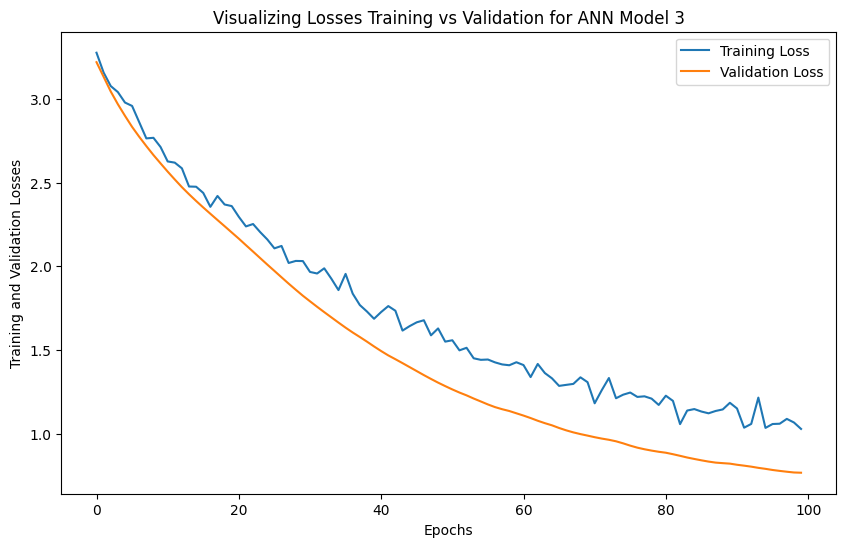

In [55]:
plt.figure(figsize=(10,6))
plt.plot(ann_history3.history['loss'])
plt.plot(ann_history3.history['val_loss'])

plt.title('Visualizing Losses Training vs Validation for ANN Model 3')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epochs')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

In [56]:
min_tloss_3 = ann_history3.history['loss']
min_tloss_3 = min(min_tloss_3)

min_vloss_3 = ann_history3.history['val_loss']
min_vloss_3 = min(min_vloss_3)

acc3 = ann_history3.history['accuracy']
acc3 = max(acc3)


print('Results from Experiment 3 (with Dropout technique of 0.5 and L2 Regularization): ')
print('\n')
print('Training Loss for experiment 3 is:' ,np.round(min_tloss_3,4))
print('Validation Loss for experiment 3 is:' ,np.round(min_vloss_3,4))
print('Accuracy for experiment 3 is:' ,np.round(acc3,4))

Results from Experiment 3 (with Dropout technique of 0.5 and L2 Regularization): 


Training Loss for experiment 3 is: 1.0277
Validation Loss for experiment 3 is: 0.766
Accuracy for experiment 3 is: 0.8281


## ANN Models Experiments 1, 2, and 3 Observations

In [63]:
Models = {'Experiment': ['Model 1', 'Model 2', 'Model 3'],
          'Training Loss': [min_tloss_1, min_tloss_2, min_tloss_3],
          'Validation Loss': [min_vloss_1, min_vloss_2, min_vloss_3],
          'Accuracy': [acc1, acc2, acc3]}

Models_Results = pd.DataFrame(Models)

Models_Results

,Experiment,Training Loss,Validation Loss,Accuracy
0,Model 1,0.257868,0.196580,0.953125
1,Model 2,0.350817,0.193359,0.921875
2,Model 3,1.027696,0.766009,0.828125


Based on these 3 experiments:

-	Experiment 1: Performs well in terms of losses, and it also gets a 95% of accuracy score. However, it has no dropout layers or other regularization techniques like L1 or L2 that can help its performance and prevent cases of overfitting.

-	Experiment 2: Has dropout layers as regularization techniques. Even though it has a smaller accuracy score of 92% it shows no real significant impact regarding validation loss (validation losses M1 vs M2 difference is really small). This might even show that the Experiment generalize better to unseen data.

-	Experiment 3: Has a much lower accuracy score and a higher validation loss in comparison to the other two experiments, it has 83% of accuracy score. This might be due to the combination of regularization techniques of dropouts and L2. In this case the Experiment might even be suffering from a case of underfitting.

Experiment 2 is the chosen experiment to test the ANN Network.


## Testing ANN Model

In [64]:
ann_test_loss, ann_test_accuracy = ANN_model2.evaluate(X_test_encoded, y_test_encoded)

print('Test Loss (Using Experiment 2):', ann_test_loss)
print('Test Accuracy (Using Experiment 2): ', ann_test_accuracy)

1/1 [==============================] - 0s 40ms/step - loss: 0.2840 - accuracy: 0.9500
Test Loss (Using Experiment 2): 0.28403371572494507
Test Accuracy (Using Experiment 2):  0.949999988079071


## Visualizing ANN Model Predictions

In [65]:
y_pred_probabilities = ANN_model2.predict(X_test_encoded)
y_pred = np.argmax(y_pred_probabilities, axis=1) # Get indices of the highest elements along the row axis

1/1 [==============================] - 0s 136ms/step


In [67]:
animal_name = df.loc[y_test.index, 'Animal'] # adding animal name into the Predictions DataFrame

In [68]:
Predictions = pd.DataFrame({'Animal': animal_name,
                            'Actual Type': np.argmax(y_test_encoded, axis=1),
                            'Predicted Type': y_pred})

Since Numpy's argmax function was used to get the indinces of the predicted classes we need to add +1 in order to get back to the original label range of Types 1 to 7 and not 0 to 6.

In [69]:
Predictions['Actual Type'] = Predictions['Actual Type'] + 1 # adding +1
Predictions['Predicted Type'] = Predictions['Predicted Type'] + 1 # adding +1


Predictions['Correct Prediction'] = Predictions['Actual Type'] == Predictions['Predicted Type'] # True vs False

Predictions

,Animal,Actual Type,Predicted Type,Correct Prediction
84,squirrel,1,1,True
54,opossum,1,1,True
71,rhea,2,2,True
46,lobster,7,7,True
45,lion,1,1,True
40,housefly,6,6,True
22,elephant,1,1,True
81,slug,7,7,True
10,cheetah,1,1,True
0,aardvark,1,1,True


Let's view the number of incorrect predictions:

In [70]:
incorrect_predictions = len(Predictions[~Predictions['Correct Prediction']]) # ~ is NOT operator in Python, it inverts the series
print('The number of incorrect predictions is:', incorrect_predictions)

The number of incorrect predictions is: 1


In [71]:
Correct_Predictions = Predictions[Predictions['Correct Prediction'] == True]
Incorrect_Predictions = Predictions[Predictions['Correct Prediction'] == False]

In [72]:
Correct_Predictions

,Animal,Actual Type,Predicted Type,Correct Prediction
84,squirrel,1,1,True
54,opossum,1,1,True
71,rhea,2,2,True
46,lobster,7,7,True
45,lion,1,1,True
40,housefly,6,6,True
22,elephant,1,1,True
81,slug,7,7,True
10,cheetah,1,1,True
0,aardvark,1,1,True


Let's review the classes again:

In [73]:
for column in class_df.columns:
    animals = class_df[column].dropna().tolist() # lets drop NaN values and convert result to list
    indv_animal = ', '.join(animals) # animal list to animal string (individual comma separation) -> ", ".join(my_list)

    print(f'{column}: {indv_animal}')

Class 1: aardvark, antelope, bear, boar, buffalo, calf, cavy, cheetah, deer, dolphin, elephant, fruitbat, giraffe, girl, goat, gorilla, hamster, hare, leopard, lion, lynx, mink, mole, mongoose, opossum, oryx, platypus, polecat, pony, porpoise, puma, pussycat, raccoon, reindeer, seal, sealion, squirrel, vampire, vole, wallaby, wolf
Class 2: chicken, crow, dove, duck, flamingo, gull, hawk, kiwi, lark, ostrich, parakeet, penguin, pheasant, rhea, skimmer, skua, sparrow, swan, vulture, wren
Class 3: pitviper, seasnake, slowworm, tortoise, tuatara
Class 4: bass, carp, catfish, chub, dogfish, haddock, herring, pike, piranha, seahorse, sole, stingray, tuna
Class 5: frog, newt, toad
Class 6: flea, gnat, honeybee, housefly, ladybird, moth, termite, wasp
Class 7: clam, crab, crayfish, lobster, octopus, scorpion, seawasp, slug, starfish, worm


In [74]:
Incorrect_Predictions

,Animal,Actual Type,Predicted Type,Correct Prediction
77,seawasp,7,4,False


# References:

- Zoo Dataset: https://archive.ics.uci.edu/dataset/111/zoo

- From Excel to CSV: https://www.geeksforgeeks.org/convert-excel-to-csv-in-python/

- Basic EDA Python Stuff: https://note.nkmk.me/en/python-pandas-nan-judge-count/

- Basic Python Strings syntax: https://realpython.com/python-f-strings/

- Pandas Pivot(): https://www.w3resource.com/pandas/dataframe/dataframe-pivot.php

- Pandas Reset Index: https://stackoverflow.com/questions/20490274/how-to-reset-index-in-a-pandas-dataframe

- Separating strings and Join list: https://www.freecodecamp.org/news/python-string-split-and-join-methods-explained-with-examples/#:~:text=When%20you%20need%20to%20split,use%20the%20split()%20method.&text=In%20the%20above%20syntax%3A,d%20like%20to%20split%20on.

- Matplotlib figsizes: https://www.freecodecamp.org/news/matplotlib-figure-size-change-plot-size-in-python/

- Errorbars elimination: https://stackoverflow.com/questions/40088585/turn-off-errorbars-in-seaborn-plots

- Computing Correlation Matrix Pandas: https://www.geeksforgeeks.org/create-a-correlation-matrix-using-python/

- Plotting Diagonal Correlation Matrix: https://seaborn.pydata.org/examples/many_pairwise_correlations.html

- ML Scaling techniques: https://www.geeksforgeeks.org/standardscaler-minmaxscaler-and-robustscaler-techniques-ml/

- Preprocessor: https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html

- Python list comprehension: https://www.w3schools.com/python/python_lists_comprehension.asp

- Column Transformer: https://towardsdatascience.com/columntransformer-in-scikit-for-labelencoding-and-onehotencoding-in-machine-learning-c6255952731b

- Activation Functions: https://machinelearningmastery.com/softmax-activation-function-with-python/#:~:text=The%20softmax%20function%20is%20used%20as%20the%20activation%20function%20in,more%20than%20two%20class%20labels.

- AutoEncoder using Keras API: https://blog.keras.io/building-autoencoders-in-keras.html

- AutoEncoder: https://towardsdatascience.com/anomaly-detection-using-autoencoders-5b032178a1ea

- AutoEncoder including MSE: https://jannik-zuern.medium.com/but-what-is-an-autoencoder-26ec3386a2af

- AutoEncoder Dimensionality Reduction: https://www.analyticsvidhya.com/blog/2021/06/dimensionality-reduction-using-autoencoders-in-python/

- AutoEncoder: https://saturncloud.io/blog/tensorflow-autoencoder-how-to-calculate-reconstruction-error/#:~:text=An%20autoencoder%20works%20by%20minimizing,to%20reconstruct%20the%20input%20data.

- Classifying Data using AutoEncoder: https://www.geeksforgeeks.org/ml-classifying-data-using-an-auto-encoder/

- EarlyStopping: https://towardsdatascience.com/a-practical-introduction-to-early-stopping-in-machine-learning-550ac88bc8fd

- EarlyStopping: https://stackoverflow.com/questions/60627667/trouble-with-earlystopping-in-tf-keras

- Reconstruction Error: https://saturncloud.io/blog/tensorflow-autoencoder-how-to-calculate-reconstruction-error/

- Reconsttruction Error: https://ai.stackexchange.com/questions/27341/in-variational-autoencoders-why-do-people-use-mse-for-the-loss

- Reconstruction Error: https://stats.stackexchange.com/questions/274123/evaluating-an-autoencoder-possible-approaches

- AutoEncoder MSE: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9287259/

- Using the encoded data in Logistic Regression: https://machinelearningmastery.com/autoencoder-for-classification/

- Extracting encoder: https://stackoverflow.com/questions/57875581/how-to-get-output-from-a-specific-layer-in-keras-tf-the-bottleneck-layer-in-aut

- Extracting encoder: https://stackoverflow.com/questions/52271644/extract-encoder-and-decoder-from-trained-autoencoder

- Exracting encoder: https://stackoverflow.com/questions/67844997/how-to-seperately-save-keras-encoder-and-decoder

- Applied Deep Learning: https://towardsdatascience.com/applied-deep-learning-part-1-artificial-neural-networks-d7834f67a4f6

- ANN Model: https://www.atmosera.com/blog/multiclass-classification-with-neural-networks/

- ANN Model: https://medium.com/analytics-vidhya/artificial-neural-network-ann-with-keras-simplified-use-case-if-student-pass-the-exam-code-949ddb2a9c91

- ANN Model: https://towardsdatascience.com/visualizing-artificial-neural-networks-anns-with-just-one-line-of-code-b4233607209e

- ANN Model: https://medium.com/analytics-vidhya/artificial-neural-network-ann-with-keras-simplified-use-case-if-student-pass-the-exam-code-949ddb2a9c91

- Neurons: https://stackoverflow.com/questions/24470582/why-hidden-layers-of-neural-networks-often-contain-64-128-256-neurons

- Softmax Activation Function: https://www.pinecone.io/learn/softmax-activation/

- ann_viz: https://stackoverflow.com/questions/76036148/ann-visualizer-error-layer-not-supported-for-visualizing

- ann_viz: https://stackoverflow.com/questions/67815094/attributeerror-tensorflow-core-python-keras-api-v2-keras-layers-experimental

- Categorical Cross Entropy Loss: https://www.v7labs.com/blog/cross-entropy-loss-guide#:~:text=Categorical%20Cross%20Entropy%20is%20also,N%20classes%20for%20each%20image.

- Categorical Cross Entropy: https://towardsdatascience.com/cross-entropy-loss-function-f38c4ec8643e

- Categorical Cross Entropy: https://neuralthreads.medium.com/categorical-cross-entropy-loss-the-most-important-loss-function-d3792151d05b

- Keras to_categorical: https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical

- Keras to_categorical: https://www.geeksforgeeks.org/python-keras-keras-utils-to_categorical/

- Index 7 error: https://stackoverflow.com/questions/40448208/python-indexerror-index-7-is-out-of-bounds-for-axis-1-with-size-7

- Dropout layer technique: https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/

- Keras L2: https://keras.io/api/layers/regularizers/

- Numpy Argmax(): https://sparkbyexamples.com/numpy/how-to-use-numpy-argmax-in-python/

- NOT Operator: https://www.w3schools.com/python/python_operators.asp

- NOT Operator (inverter): https://stackoverflow.com/questions/15998188/how-can-i-obtain-the-element-wise-logical-not-of-a-pandas-series

- Deep Learning Principles HMWs 3 and 6